# System Model V3 - Query: does market price decline with controller, when $K_i = 0$ and $\alpha = 0$?


The purpose of this notebook is to simulate a single run of the full CDP and APT system model, using a stochastic Ethereum price and liquidity demand process as a driver.


For this simulation run, we will be asking the following question:  does market price decline with controller, when $K_i = 0$?

---
2. Query: does market price decline with controller, when $K_i = 0$?
---
  - Run simulation with:
     - ETH price shock OFF
     - Liquidity shocks OFF
     - Controller ON with $K_p$ equalling recommended value and $K_i = 0$
     - $\alpha = 0$
     - 1 year simulation
     - Arbitrageur considers liquidation ratio:
       - ON
       - OFF
     - Target price rescaled:
       - ON
       - OFF

We will override the recommended parameters in [init.py](https://github.com/BlockScience/reflexer/blob/experiment-analysis/models/system_model_v3/model/params/init.py)


In order to test this, configure the following experiment [Query_2.py](experiments/system_model_v3/Query_2.py). Run run this simulation, we create a directory in the ```experiments/system_model_v3``` called ```Query_2/```,and add a ```logs/``` directory inside of it.

Assuming our we have all of the requirements required (run requirements.txt from the ```reflexer/``` root directory to be sure. Assuming our terminal is in the root directory, we run the follow to run the simulation:

```bash
cd experiments/system_model_v3
python3 -m experiments.system_model_v3.Query_2
```
And our simulation will run. The resulting [run log](experiments/system_model_v3/sanity_check_plot/experiment_run_log.md) can be found in the ```experiments/system_model_v3/Query_2/``` directory, along with the simulation results stored as ```experiment_results.hdf5```


Below we will import and examine the simulation results.


In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

%matplotlib inline

## Import simulation run data


In [2]:
os.getcwd()

'/home/aclarkdata/repos/reflexer/notebooks/analysis'

In [3]:
os.chdir('../../')
os.getcwd()

'/home/aclarkdata/repos/reflexer'

In [4]:
experiment_results = 'experiments/system_model_v3/Query_2_1_year/experiment_results.hdf5'
experiment_results_keys = []
with pd.HDFStore(experiment_results) as store:
    experiment_results_keys = list(filter(lambda x: "results" in x, store.keys()))
    exceptions_keys = list(filter(lambda x: "exceptions" in x, store.keys()))

In [5]:
# A list of all experiment result keys
experiment_results_keys

['/results_2021-02-26T12:43:00.674531']

In [6]:
# Copy a results_ key from the above keys to select the experiment
experiment_results_key = experiment_results_keys[-1]#'results_2021-02-09T18:46:33.073363' # Or select last result: experiment_results_keys[-1]
experiment_timestamp = experiment_results_key.strip('results_')
exceptions_key = 'exceptions_' + experiment_timestamp
experiment_timestamp

'/results_2021-02-26T12:43:00.674531'

In [7]:
df_raw = pd.read_hdf(experiment_results, experiment_results_key)
df_raw.tail()

,cdp_metrics,optimal_values,sim_metrics,timedelta,cumulative_time,timestamp,blockheight,eth_price,liquidity_demand,liquidity_demand_mean,...,RAI_balance,ETH_balance,UNI_supply,uniswap_oracle,simulation,subset,run,substep,timestep,events
33269,"{'cdp_count': 1, 'open_cdp_count': 1, 'closed_...",{},{},3600,29192400,2017-12-04 21:00:00,0,279.941104,498.397994,415.268926,...,163589.077389,5249.999116,242216.975396,None,0,3,1,18,8109,NaN
33270,"{'cdp_count': 1, 'open_cdp_count': 1, 'closed_...",{},{},3600,29196000,2017-12-04 22:00:00,0,278.961001,-488.910197,-36.820635,...,167536.653620,5126.749585,242216.975396,None,0,3,1,18,8110,NaN
33271,"{'cdp_count': 1, 'open_cdp_count': 1, 'closed_...",{},{},3600,29199600,2017-12-04 23:00:00,0,278.681688,103.074448,33.126906,...,112356.574893,7652.176644,242216.975396,None,0,3,1,18,8111,NaN
33272,"{'cdp_count': 1, 'open_cdp_count': 1, 'closed_...",{},{},3600,29203200,2017-12-05 00:00:00,0,277.780389,-110.861951,-38.867522,...,97998.231185,8776.722624,242216.975396,None,0,3,1,18,8112,NaN
33273,"{'cdp_count': 1, 'open_cdp_count': 1, 'closed_...",{},{},3600,29206800,2017-12-05 01:00:00,0,276.952242,14.323883,-12.271820,...,58260.202316,14785.474465,242252.378969,<models.system_model_v3.model.parts.uniswap_or...,0,3,1,18,8113,NaN


## Post process


In [8]:
from experiments.system_model_v3.post_process import post_process_results
from experiments.system_model_v3.Query_2_1_year import params, SIMULATION_TIMESTEPS


* Number of timesteps: 8640 / 360.0 days
* Number of MC runs: 1
* Timestep duration: 0.004 seconds
* Control parameters: ['arbitrageur_considers_liquidation_ratio', 'rescale_target_price']
* Number of parameter combinations: 4
* Expected experiment duration: 2.3040000000000003 minutes / 0.038400000000000004 hours
    


In [9]:
params

{'debug': [False],
 'raise_on_assert': [True],
 'free_memory_states': [['events', 'cdps', 'uniswap_oracle']],
 'IntegralType': [2],
 'eth_price': [<function models.system_model_v3.model.params.init.<lambda>(run, timestep, df=               0           1           2           3           4           5  \
0     294.069151  289.017021  311.479566  285.456136  304.561903  305.249439   
1     291.208252  286.293512  308.368393  288.932571  301.276414  303.457638   
2     292.287792  286.429957  306.696987  287.508217  303.735994  303.220909   
3     289.343698  285.480534  308.867090  287.181073  302.385064  306.232074   
4     286.827771  283.609768  310.211675  286.439339  300.952013  303.643975   
...          ...         ...         ...         ...         ...         ...   
8754  291.054350  273.183841  278.623425  283.930814  268.277872  277.211292   
8755  290.618717  272.267694  278.507186  283.542749  268.235307  277.708453   
8756  294.051768  276.645918  278.793335  286.448911  2

In [10]:
# add swept parameters as a column
df = post_process_results(df_raw, params, set_params=['rescale_target_price','arbitrageur_considers_liquidation_ratio','liquidation_ratio'])
df

Adding new columns
0.06581854820251465
Getting parameter sweep
0.06606626510620117
Assigning parameters to subsets
0.1840217113494873
Creating target_price_scaled
0.190201997756958


,cdp_metrics,optimal_values,sim_metrics,timedelta,cumulative_time,timestamp,blockheight,eth_price,liquidity_demand,liquidity_demand_mean,...,run,substep,timestep,events,eth_collateral_value,collateralization_ratio,rescale_target_price,arbitrageur_considers_liquidation_ratio,liquidation_ratio,target_price_scaled
0,{},{},{},0,0,2017-01-01 00:00:00,0,294.069151,1.000000,1.000000,...,1,0,0,NaN,4.553000e+07,1.450000,True,True,1.45,4.553000
1,"{'cdp_count': 1, 'open_cdp_count': 1, 'closed_...",{},{},3600,3600,2017-01-01 01:00:00,0,291.208252,906.674484,453.837242,...,1,18,1,NaN,4.508705e+07,1.435893,True,True,1.45,3.140000
2,"{'cdp_count': 1, 'open_cdp_count': 1, 'closed_...",{},{},3600,7200,2017-01-01 02:00:00,0,292.287792,-326.024615,63.906314,...,1,18,2,NaN,3.142197e+07,1.455375,True,True,1.45,3.140000
3,"{'cdp_count': 1, 'open_cdp_count': 1, 'closed_...",{},{},3600,10800,2017-01-01 03:00:00,0,289.343698,209.658450,136.782382,...,1,18,3,NaN,3.110547e+07,1.435395,True,True,1.45,3.140000
4,"{'cdp_count': 1, 'open_cdp_count': 1, 'closed_...",{},{},3600,14400,2017-01-01 04:00:00,0,286.827771,-79.844839,28.468771,...,1,18,4,NaN,3.083500e+07,1.437392,True,True,1.45,3.140000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33269,"{'cdp_count': 1, 'open_cdp_count': 1, 'closed_...",{},{},3600,29192400,2017-12-04 21:00:00,0,279.941104,498.397994,415.268926,...,1,18,8109,NaN,7.421234e+06,1.450393,False,False,1.45,0.452683
33270,"{'cdp_count': 1, 'open_cdp_count': 1, 'closed_...",{},{},3600,29196000,2017-12-04 22:00:00,0,278.961001,-488.910197,-36.820635,...,1,18,8110,NaN,7.395251e+06,1.445110,False,False,1.45,0.452624
33271,"{'cdp_count': 1, 'open_cdp_count': 1, 'closed_...",{},{},3600,29199600,2017-12-04 23:00:00,0,278.681688,103.074448,33.126906,...,1,18,8111,NaN,7.387847e+06,1.448736,False,False,1.45,0.452566
33272,"{'cdp_count': 1, 'open_cdp_count': 1, 'closed_...",{},{},3600,29203200,2017-12-05 00:00:00,0,277.780389,-110.861951,-38.867522,...,1,18,8112,NaN,7.363953e+06,1.446469,False,False,1.45,0.452203


# Simulation Analysis


    -  **If market price does not decline when arbitrageur considers liquidation ratio is ON and target price rescaled is ON**:
       - Implication from Reflexer: negative $K_i$ term is causing market price decline, proceed to Query 3 


In [11]:
df.substep.unique()

array([ 0, 18])

In [12]:
df.subset.unique()

array([0, 1, 2, 3])

In [13]:
df.columns

Index(['cdp_metrics', 'optimal_values', 'sim_metrics', 'timedelta',
       'cumulative_time', 'timestamp', 'blockheight', 'eth_price',
       'liquidity_demand', 'liquidity_demand_mean', 'cdps', 'eth_collateral',
       'eth_locked', 'eth_freed', 'eth_bitten', 'principal_debt', 'rai_drawn',
       'rai_wiped', 'rai_bitten', 'accrued_interest', 'interest_dripped',
       'interest_wiped', 'interest_bitten', 'w_1', 'w_2', 'w_3',
       'system_revenue', 'stability_fee', 'market_price', 'market_price_twap',
       'target_price', 'target_rate', 'eth_return', 'eth_gross_return',
       'expected_market_price', 'expected_debt_price', 'error_star',
       'error_star_integral', 'market_slippage', 'RAI_balance', 'ETH_balance',
       'UNI_supply', 'uniswap_oracle', 'simulation', 'subset', 'run',
       'substep', 'timestep', 'events', 'eth_collateral_value',
       'collateralization_ratio', 'rescale_target_price',
       'arbitrageur_considers_liquidation_ratio', 'liquidation_ratio',
       

### Generate key plots for analysis

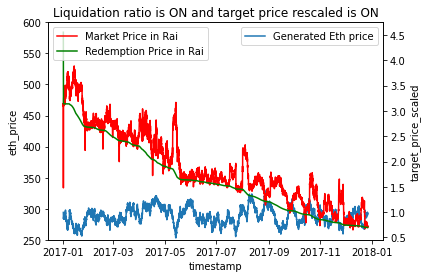

In [14]:
df_true_true = df.query('rescale_target_price==True and arbitrageur_considers_liquidation_ratio == True')
sns.lineplot(data=df_true_true,x="timestamp", y="eth_price",label='Generated Eth price')
plt.ylim(250, 600)
ax2 = plt.twinx()
sns.lineplot(data=df_true_true,x="timestamp", y="market_price",ax=ax2,color='r',label='Market Price in Rai')
sns.lineplot(data=df_true_true,x="timestamp", y="target_price_scaled",ax=ax2,color='g',label='Redemption Price in Rai')
plt.title('Liquidation ratio is ON and target price rescaled is ON')
plt.legend(loc="upper left")
plt.show()

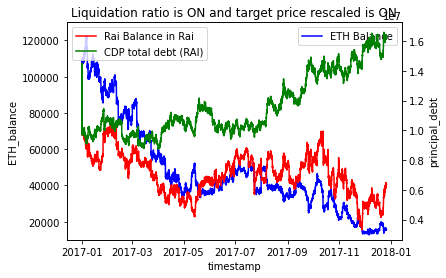

In [26]:
sns.lineplot(data=df_true_true,x="timestamp", y="ETH_balance",color='b',label='ETH Balance')
plt.ylim(10000, 130000)
ax2 = plt.twinx()
sns.lineplot(data=df_true_true,x="timestamp", y="RAI_balance",ax=ax2,color='r',label='Rai Balance in Rai')
sns.lineplot(data=df_true_true,x="timestamp", y="principal_debt",ax=ax2,color='g',label='CDP total debt (RAI)')
plt.title('Liquidation ratio is ON and target price rescaled is ON')
plt.legend(loc="upper left")

## Conclusion

Market price does decline when arbitrageur considers liquidation ratio is ON and target price rescaled is ON with $K_i = 0$.
